

# Lab06: Discrete Cosine Transform



In [83]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [84]:
import numpy as np
PI2 = np.pi * 2

import matplotlib.pyplot as plt

from thinkdsp import decorate

## Exercise 6.1

Показать на графике время работы ```analyze1``` и ```analyze2``` в логорифмическом масштабе. Сравнить с ```scipy.fftpack.dct```.

In [85]:
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

In [86]:
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = M.dot(ys) / 2
    return amps

In [87]:
def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

Возьмём размеры массива как степени 2.

In [88]:
ns = 2 ** np.arange(5,10)
ns

array([ 32,  64, 128, 256, 512])

Посмотрим как работает функция ```%timeit```.

In [89]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
  def evaluate(self, ts):
    ys = np.random.poisson(self.amp,len(ts))
    return ys

In [90]:
noise = UncorrelatedPoissonNoise(1)
wave = noise.make_wave(duration=1,framerate = 16384)
wave.ys.shape

(16384,)

In [91]:
bm = %timeit -r1 -o analyze1(wave.ys[:32],(0.5 + np.arange(32)) / 2,(0.5+np.arange(32))/32)

The slowest run took 41.44 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 1: 129 µs per loop


In [92]:
bm

<TimeitResult : 10000 loops, best of 1: 129 µs per loop>

Теперь в циклах проверим каждую функцию.

In [93]:
best_analyze1 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze1(ys,freqs,ts)
    best_analyze1.append(best.best)
best_analyze1

The slowest run took 8.58 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 1: 102 µs per loop
1000 loops, best of 1: 316 µs per loop
1000 loops, best of 1: 1.21 ms per loop
100 loops, best of 1: 4.54 ms per loop
10 loops, best of 1: 21.3 ms per loop


[0.00010165494700004274,
 0.0003163997239998935,
 0.0012069130820000283,
 0.004538448920002338,
 0.021261004400003003]

In [94]:
best_analyze2 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze2(ys,freqs,ts)
    best_analyze2.append(best.best)
best_analyze2

The slowest run took 4.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 1: 41 µs per loop
10000 loops, best of 1: 139 µs per loop
The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 1: 779 µs per loop
100 loops, best of 1: 2.99 ms per loop
100 loops, best of 1: 11.2 ms per loop


[4.104150369994386e-05,
 0.00013877894659999584,
 0.0007789405160001479,
 0.0029858074799994938,
 0.011175786230005542]

In [95]:
import scipy.fftpack

best_dct = []
for n in ns:
    ys = wave.ys[:n]
    best =  %timeit -r1 -o scipy.fftpack.dct(ys, type=3)
    best_dct.append(best.best)
best_dct

The slowest run took 19.51 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 6.48 µs per loop
The slowest run took 164.81 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 7.17 µs per loop
The slowest run took 104.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 7.11 µs per loop
The slowest run took 170.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 8.02 µs per loop
The slowest run took 92.27 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 1: 10.7 µs per loop


[6.4797237699986e-06,
 7.16798942999958e-06,
 7.10885540000163e-06,
 8.015106650000235e-06,
 1.0744151479993888e-05]

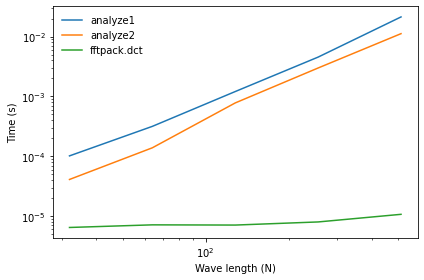

In [96]:
plt.plot(ns, best_analyze1, label='analyze1')
plt.plot(ns, best_analyze2, label='analyze2')
plt.plot(ns, best_dct, label='fftpack.dct')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Wave length (N)', ylabel='Time (s)', **loglog)

In [97]:
from scipy.stats import linregress

linregress(np.log(ns),np.log(best_analyze1))

LinregressResult(slope=1.9259150109808847, intercept=-15.988232025803772, rvalue=0.9986266157017648, pvalue=6.10847057232351e-05, stderr=0.05833580915708072)

In [98]:
linregress(np.log(ns),np.log(best_analyze2))

LinregressResult(slope=2.060541456934144, intercept=-17.2876138363593, rvalue=0.9987135875522707, pvalue=5.5375847776234486e-05, stderr=0.06040114482249423)

In [99]:
linregress(np.log(ns),np.log(best_dct))

LinregressResult(slope=0.1620247872713621, intercept=-12.550592933473082, rvalue=0.9068101302409193, pvalue=0.033668295142904814, stderr=0.04348530766277812)

Не смотря на теоритическое время исполнения, время ```analyze1``` получилсось пропорциональным  $n^2$.

## Exercise 6.2

Реализовать алгоритм сжатия для музыки или речи.

In [100]:
if not os.path.exists('164718__bradovic__piano.wav'):
    !wget https://github.com/wooftown/spbstu-telecom/raw/main/Content/164718__bradovic__piano.wav

In [101]:
from thinkdsp import read_wave

wave = read_wave('164718__bradovic__piano.wav')
wave.make_audio()

Для начала возьмём небольшой сегмент:

In [102]:
segment = wave.segment(start = 1.7,duration = 1.0)
segment.normalize()
segment.make_audio()

Вместо DFT используем DCT.

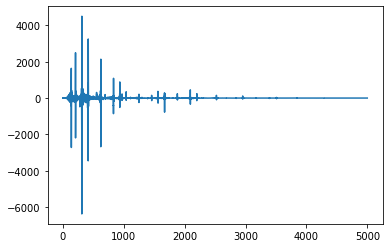

In [103]:
dct = segment.make_dct()
dct.plot(high = 5000)

In [104]:
def filtering(dct,limit = 0):
  for i, amp in enumerate(dct.amps):
    if np.abs(amp) < limit:
      dct.hs[i] = 0

In [105]:
filtering(dct,1000)

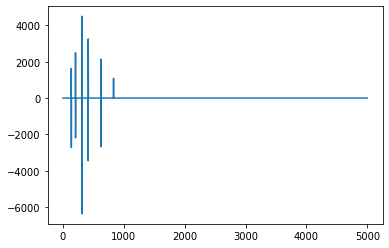

In [106]:
dct.plot(high = 5000)

Теперь подберём значение, чтобы результат звучал как исходник.

In [107]:
segment = wave.segment(start = 1.7,duration = 1.0)
segment.normalize()
segment.make_audio()

In [108]:
dct = segment.make_dct()
filtering(dct,100)

In [109]:
dct.make_wave().make_audio()

Для эффективного хранения данных можно использовать разряженные массивы.

## Exercise 6.3

В блокноте phase.ipynb взять другой сегмент звука и повторить эксперименты.

In [110]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=500, offset=0)
wave = signal.make_wave(duration=0.5, framerate=40000)
wave.make_audio()

Берём другой сегмент.

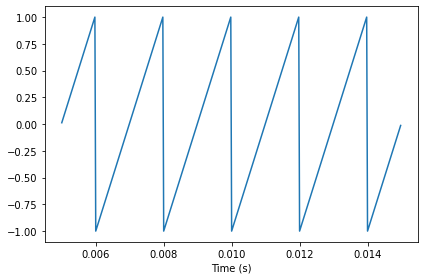

In [111]:
wave.segment(start=0.005,duration=0.01).plot()
decorate(xlabel='Time (s)')

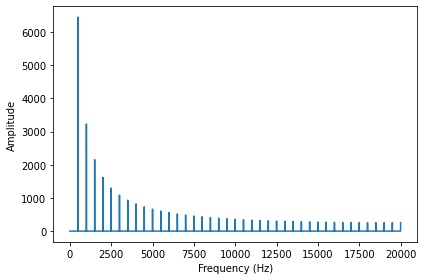

In [112]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

In [113]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)', 
             ylabel='Phase (radian)')

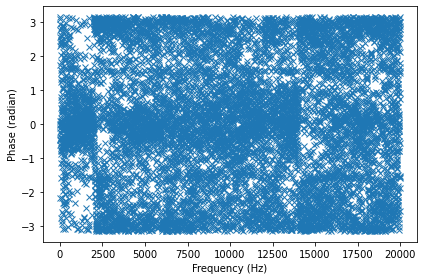

In [114]:
plot_angle(spectrum, thresh=0)

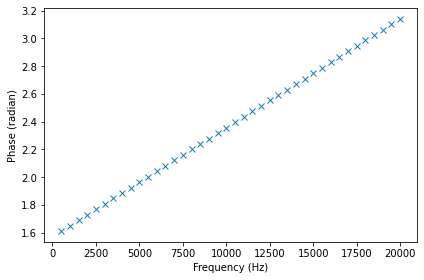

In [115]:
plot_angle(spectrum, thresh=1)

In [116]:
def plot_three(spectrum, thresh=1):
    """Plot amplitude, phase, and waveform.
    
    spectrum: Spectrum object
    thresh: threshold passed to plot_angle
    """
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

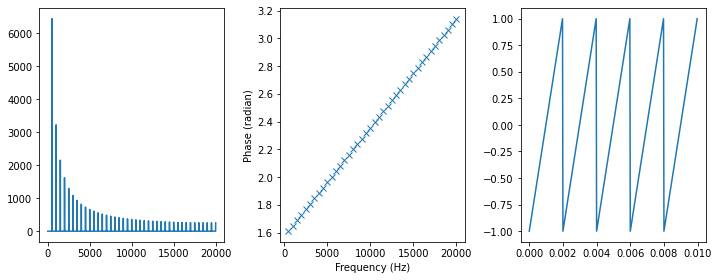

In [117]:
plot_three(spectrum)

In [118]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

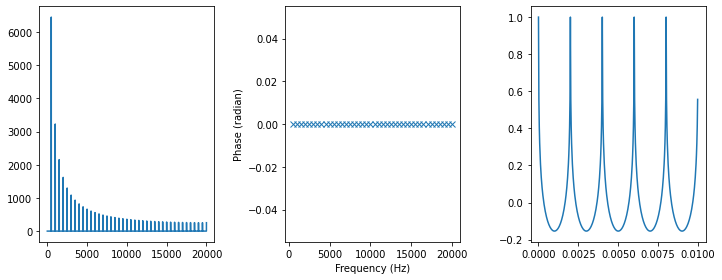

In [119]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2)

In [120]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

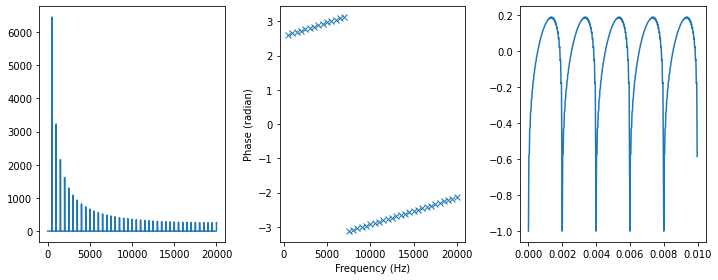

In [121]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3)

Вроде мы и сильно изменили сигнал, но воспринимаемый звук такой же.

In [122]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

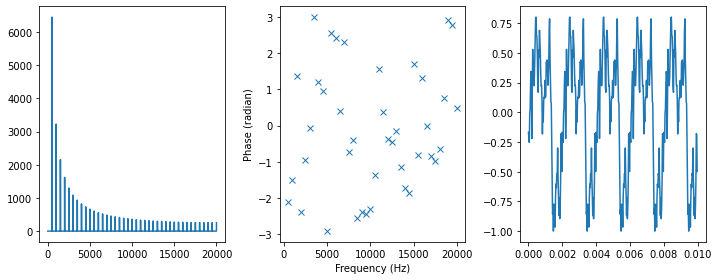

In [123]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4)

In [124]:
if not os.path.exists('120994__thirsk__120-oboe.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/120994__thirsk__120-oboe.wav

In [125]:
from thinkdsp import read_wave

wave = read_wave('120994__thirsk__120-oboe.wav')
wave.make_audio()

In [126]:
segment = wave.segment(start=0.1, duration=0.5)

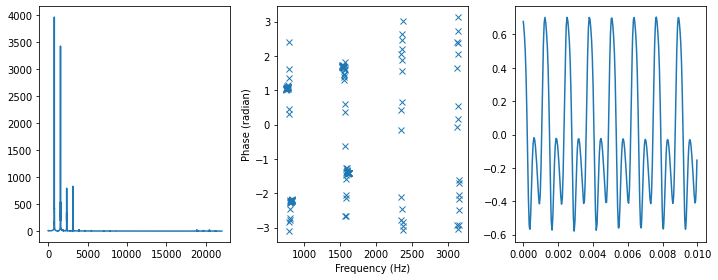

In [127]:
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

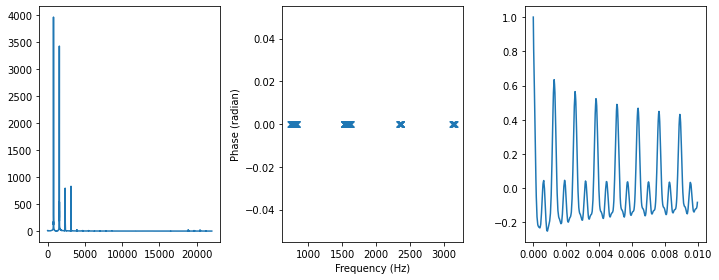

In [128]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

У нас появился странных эффект звона.

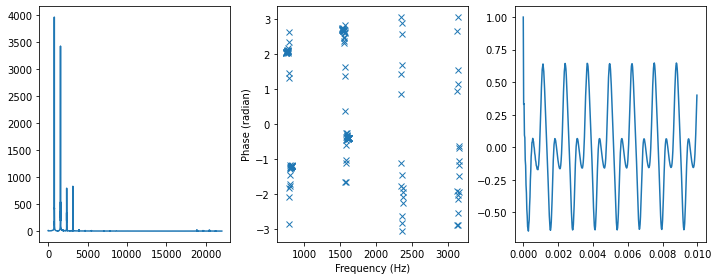

In [129]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)

Причина звона не повороты.

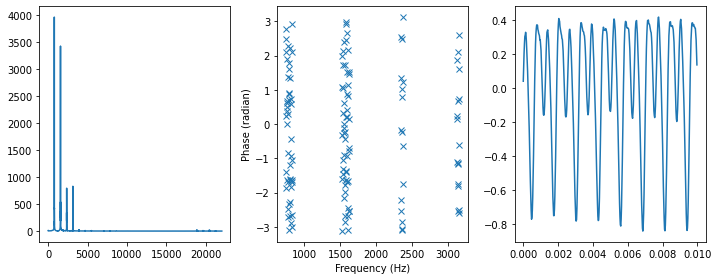

In [130]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

Мы опять очень сильно изменили сигнал, но воспринимаемый звук весьма похож на начальный.

Для звуков с простой гармонической структурой мы не слышим измнения в фазовой структуре, при условии что гармоническая структура неизменна.